<a href="https://colab.research.google.com/github/AlexeyUdod/dvp/blob/master/dvp_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).




**1. Загрузите датасет taxi.csv.**




In [0]:
import platform
if platform.system() == 'Linux':
    path = '/content/drive/My Drive/Colab Notebooks/dvp/dvp.fin/'
    from google.colab import drive
    drive.mount('/content/drive')
else:
    path = ''

In [0]:
#  !jupyter nbconvert --to html /content/drive/My Drive/Colab Notebooks/dvp/dvp.fin/dvp.fin.ipynb

# import os
# os.system(f'jupyter nbconvert --to html dvp.fin.ipynb')

In [0]:
# !pip install pandas_profiling

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [0]:
data = pd.read_csv(path +'taxi.csv')

**2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.**


In [0]:
data

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726210,0,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,Economy,private,0
99996,881472,0,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,Economy,private,0
99997,626673,1,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,Standard,private,0
99998,672584,6,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,Economy,private,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [0]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

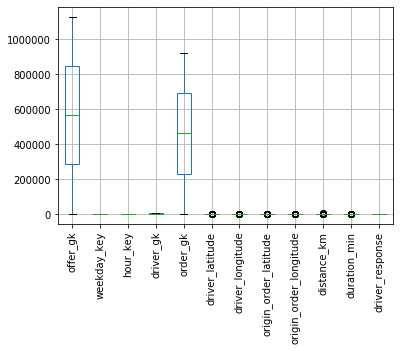

In [0]:
data.boxplot()
plt.xticks(rotation=90)

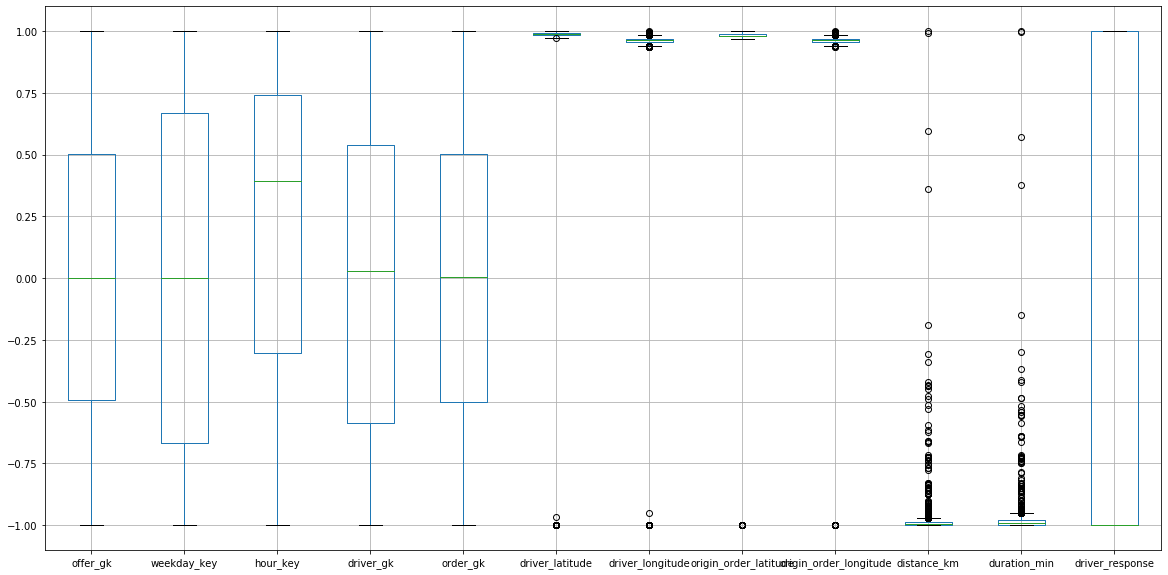

In [0]:
data_num = data[[x for x in data if x not in ['offer_class_group',	'ride_type_desc']]]
data_norm = pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(data_num), columns=data_num.columns)
data_norm.boxplot()
plt.gcf().set_size_inches(20,10)

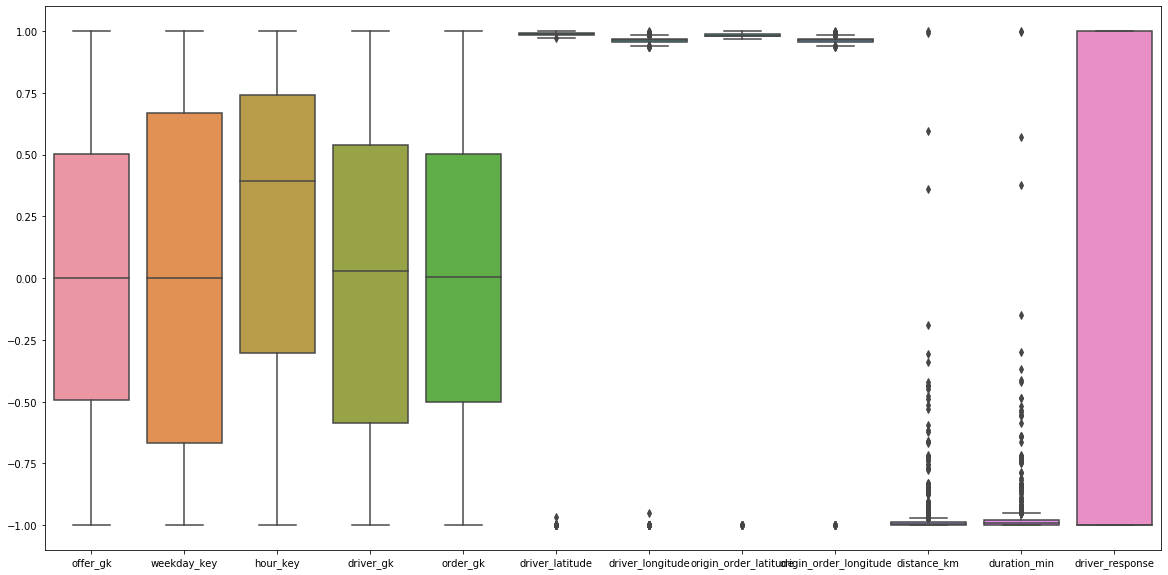

In [0]:
sns.boxplot(data=data_norm)
plt.gcf().set_size_inches(20,10)

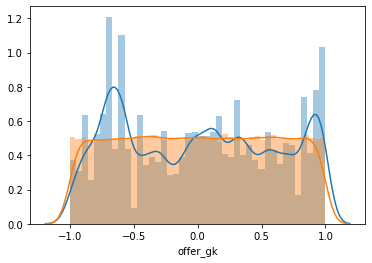

In [0]:
sns.distplot(data_norm.driver_gk)
sns.distplot(data_norm.offer_gk)

данные неплохие, есть ненужные и дублирующие колонки, надо будет проверить выбросы на координатах, дистанции и времени.


**3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.**


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [0]:
data.isnull().sum()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

Пропусков как таковых не заметно.

In [0]:
data.drop_duplicates().shape

(100000, 14)

Дубликатов не выявлено.


**4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.**


In [0]:
# data.profile_report()

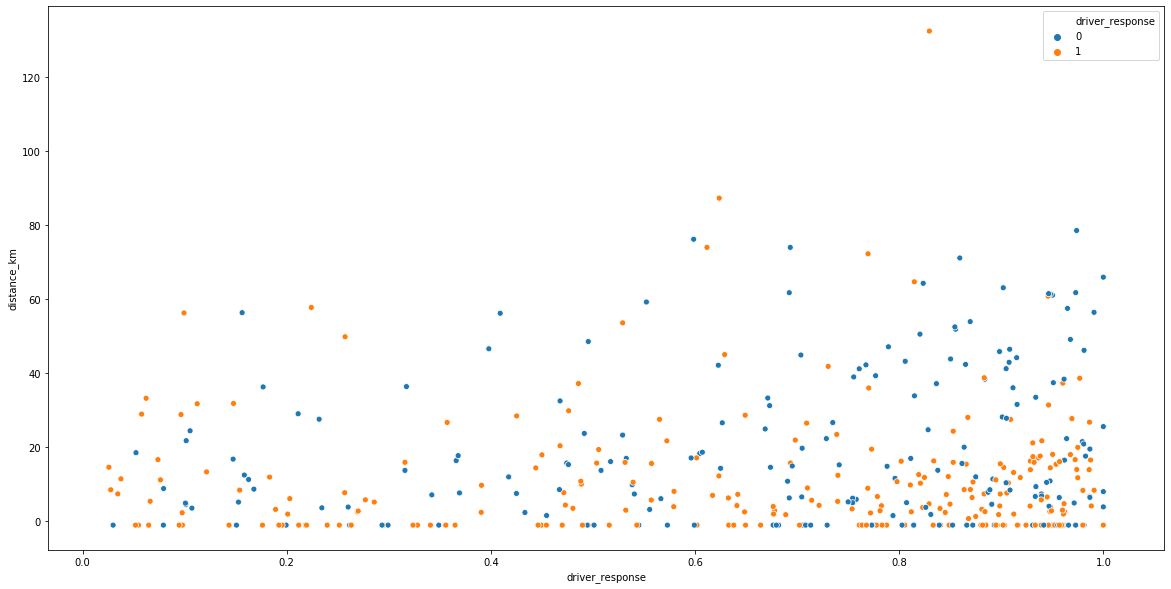

In [0]:
sns.scatterplot(data.groupby('driver_gk').driver_response.agg('mean').sort_values(ascending=False), 
                data.distance_km, 
                hue=data.driver_response)
plt.gcf().set_size_inches(20,10)

In [0]:
data.driver_gk.unique().shape

(439,)

гипотеза что реакция водителя зависит от класса заказа

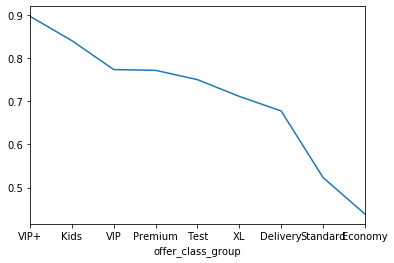

In [0]:
data.groupby('offer_class_group').driver_response.agg('mean').sort_values(ascending=False).plot()

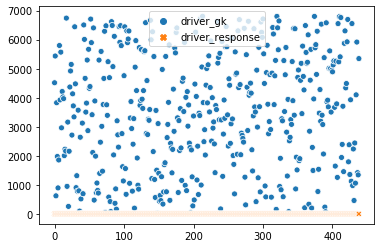

In [0]:
drive_gk1 = data.groupby('driver_gk').driver_response.agg('mean').sort_values(ascending=False).reset_index()
sns.scatterplot(data = drive_gk1)

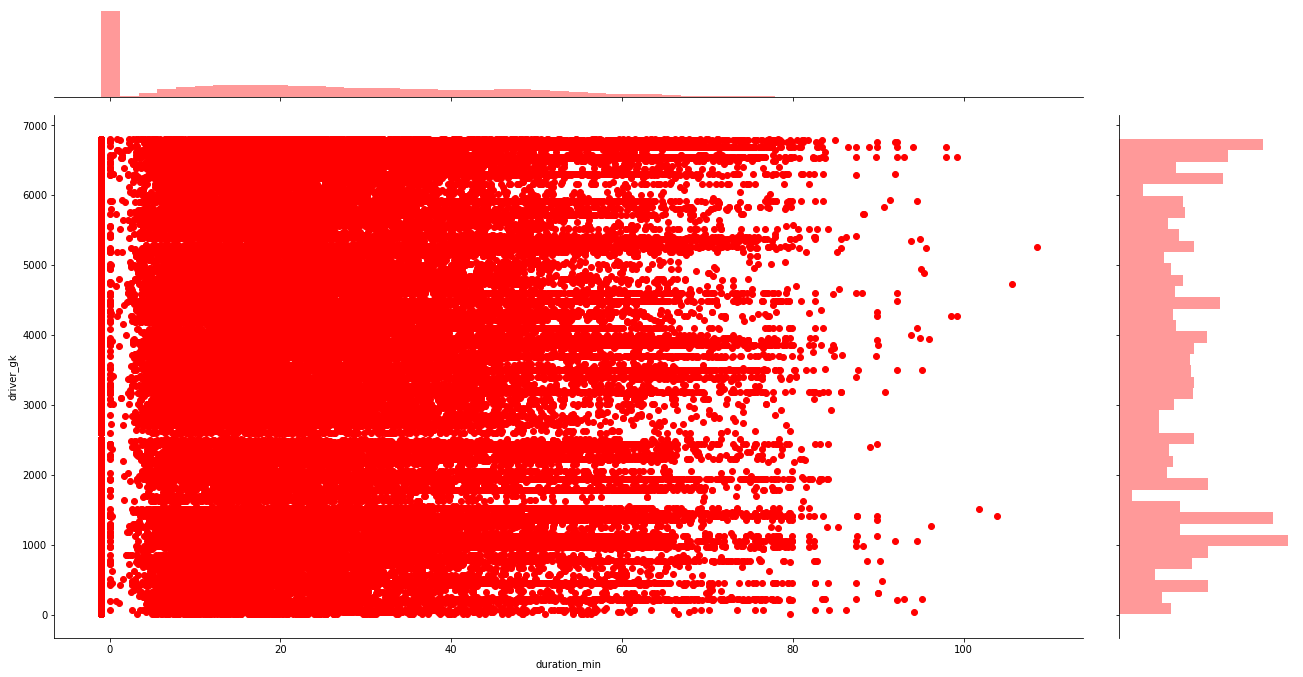

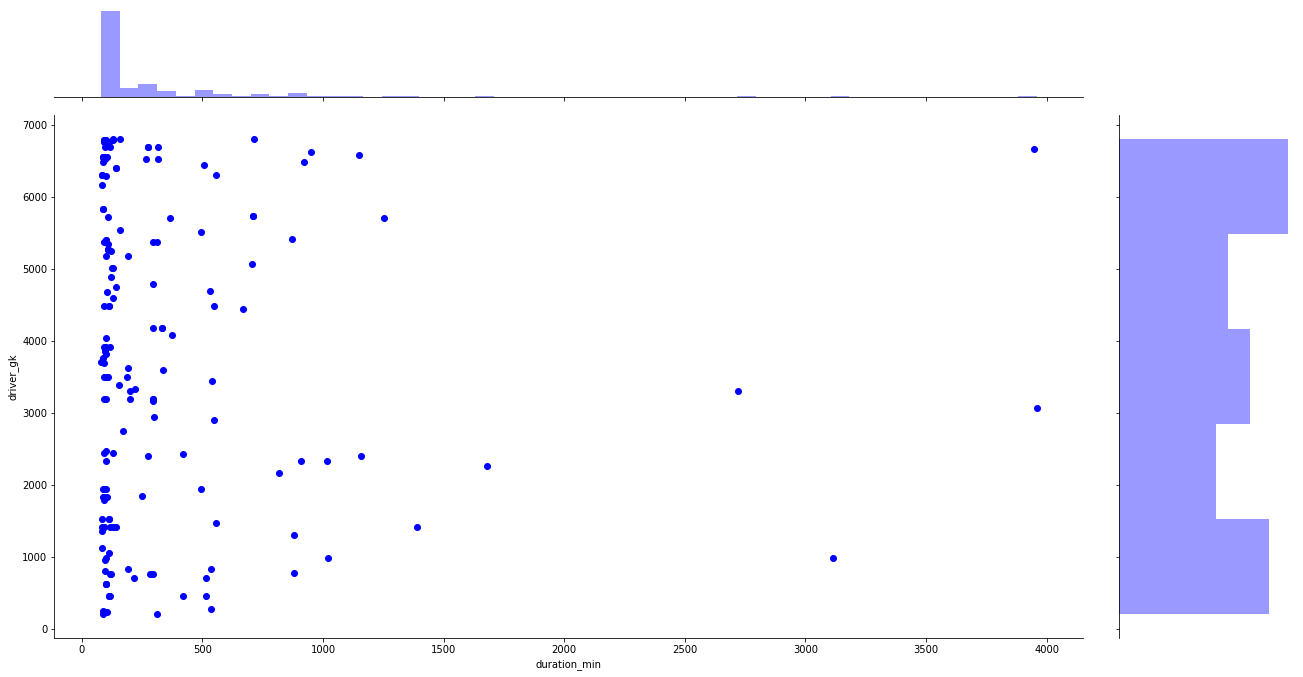

In [0]:
data1 = data[data.distance_km<100]
data2 = data[data.distance_km>100]
sns.jointplot(data1.duration_min, data1.driver_gk, color='Red')
plt.gcf().set_size_inches(20,10)
sns.jointplot(data2.duration_min, data2.driver_gk, color='Blue')
plt.gcf().set_size_inches(20,10)

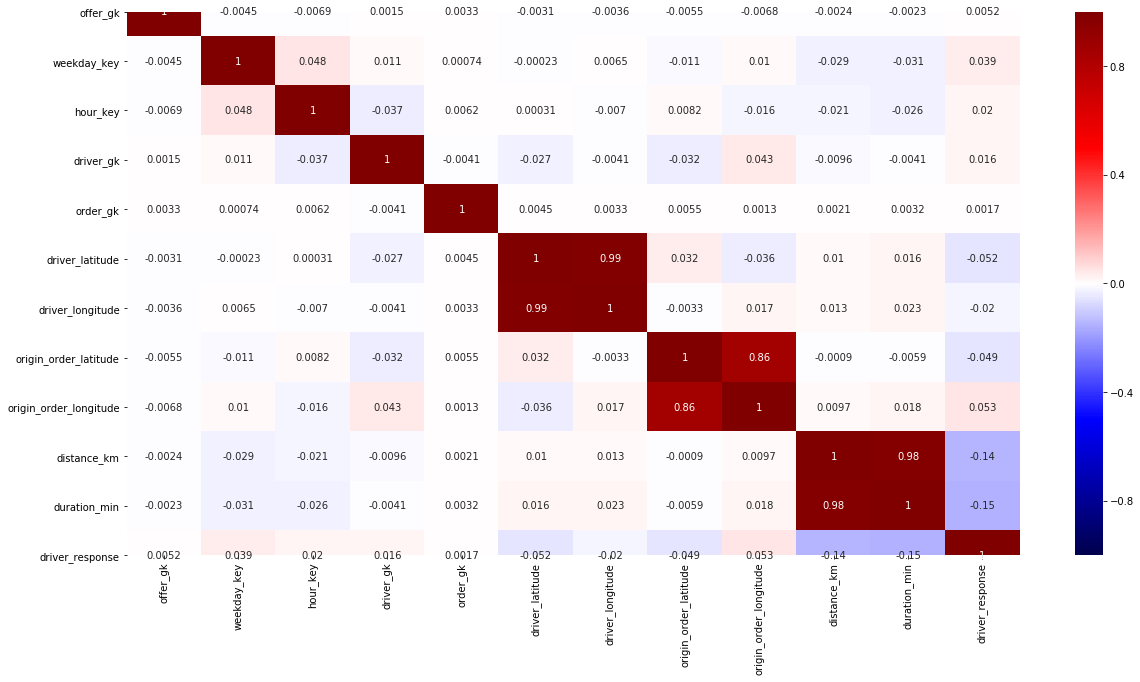

In [0]:
sns.heatmap(data.corr(),cmap='seismic', vmax=1, vmin=-1, annot=True)
plt.gcf().set_size_inches(20,10)

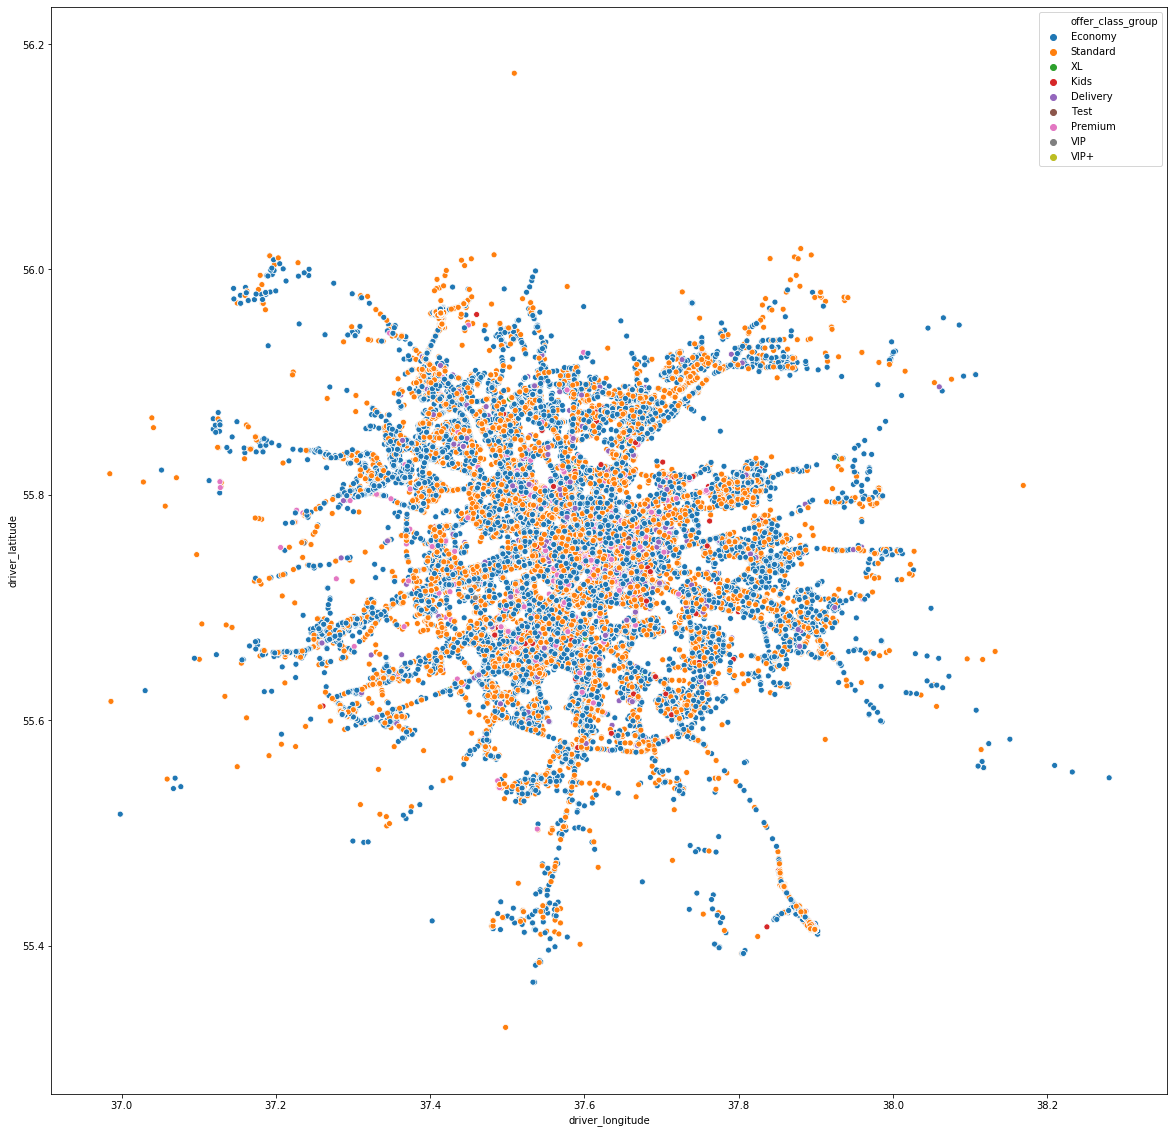

In [0]:
data1 = data[(data.driver_latitude>10)&(data.driver_longitude>10)&(data.origin_order_latitude>10)&(data.origin_order_longitude>10)]
# data2 = data[data.driver_latitude>10]
sns.scatterplot( data1.driver_longitude,data1.driver_latitude, hue=data1.offer_class_group)
# sns.scatterplot(data1.origin_order_latitude, data1.origin_order_longitude, hue=data1.driver_response, palette='Blues')
plt.gcf().set_size_inches(20,20)

В пределах МКАДа больше меток дорогих классов такси.

Визуально похоже, что на ответ водителя больше всего зависит от  конкретного водителя и от класса заказа.

**5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).**


Так как мы примененим random forest то будем использовать label encoder

In [0]:
data['offer_class_group'] = LabelEncoder().fit_transform(data['offer_class_group'])
data['ride_type_desc'] = LabelEncoder().fit_transform(data['ride_type_desc'])
data

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,1,3,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,3,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,3,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,1,3,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726210,0,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,1,3,0
99996,881472,0,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,1,3,0
99997,626673,1,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,4,3,0
99998,672584,6,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,1,3,0


**6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.**


Удалим ненужные колонки offer_gk, order_gk, distance_km, так как номера заказа и предложения не имеют значения для целевой метрики, а дистанция будет дублировать более важный параметр duration_min, по которому водители ориентируются.

In [0]:
data = data.drop(data.columns[[0,4,9]],axis=1)

Добавим новый признак как норму разницы координат между заказом и водителем (возможно это дублирует параметр который мы только что удалили, но это не точно, поэтому можно попробовать).

In [0]:
data['dist2'] = ((data.driver_latitude - data.origin_order_latitude)**2 + 
                 (data.driver_longitude - data.origin_order_longitude)**2)**0.5

Посмотрим корреляцию нового параметра со старыми.

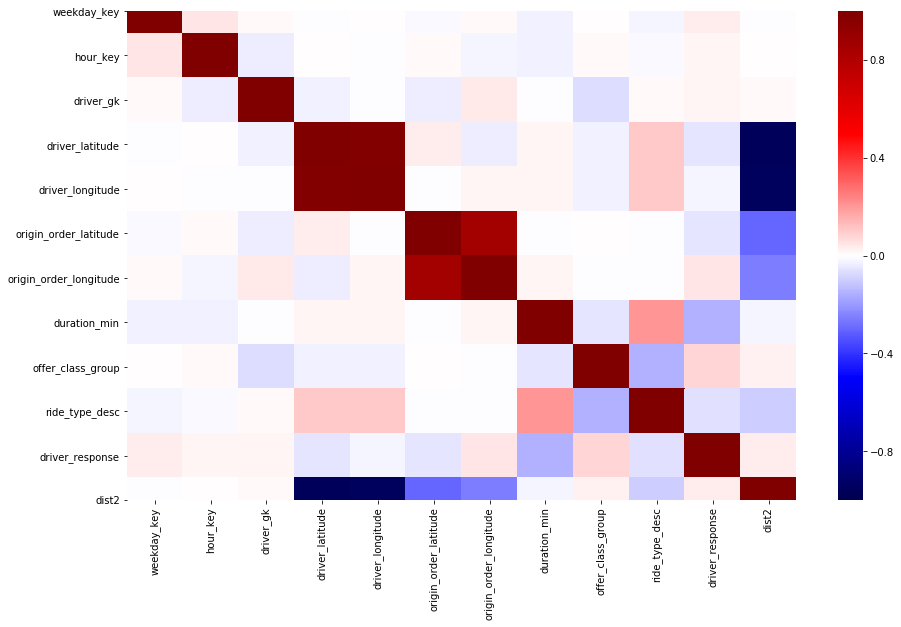

In [0]:
sns.heatmap(data.corr(), cmap='seismic', vmax=1, vmin=-1)
plt.gcf().set_size_inches(15,9)

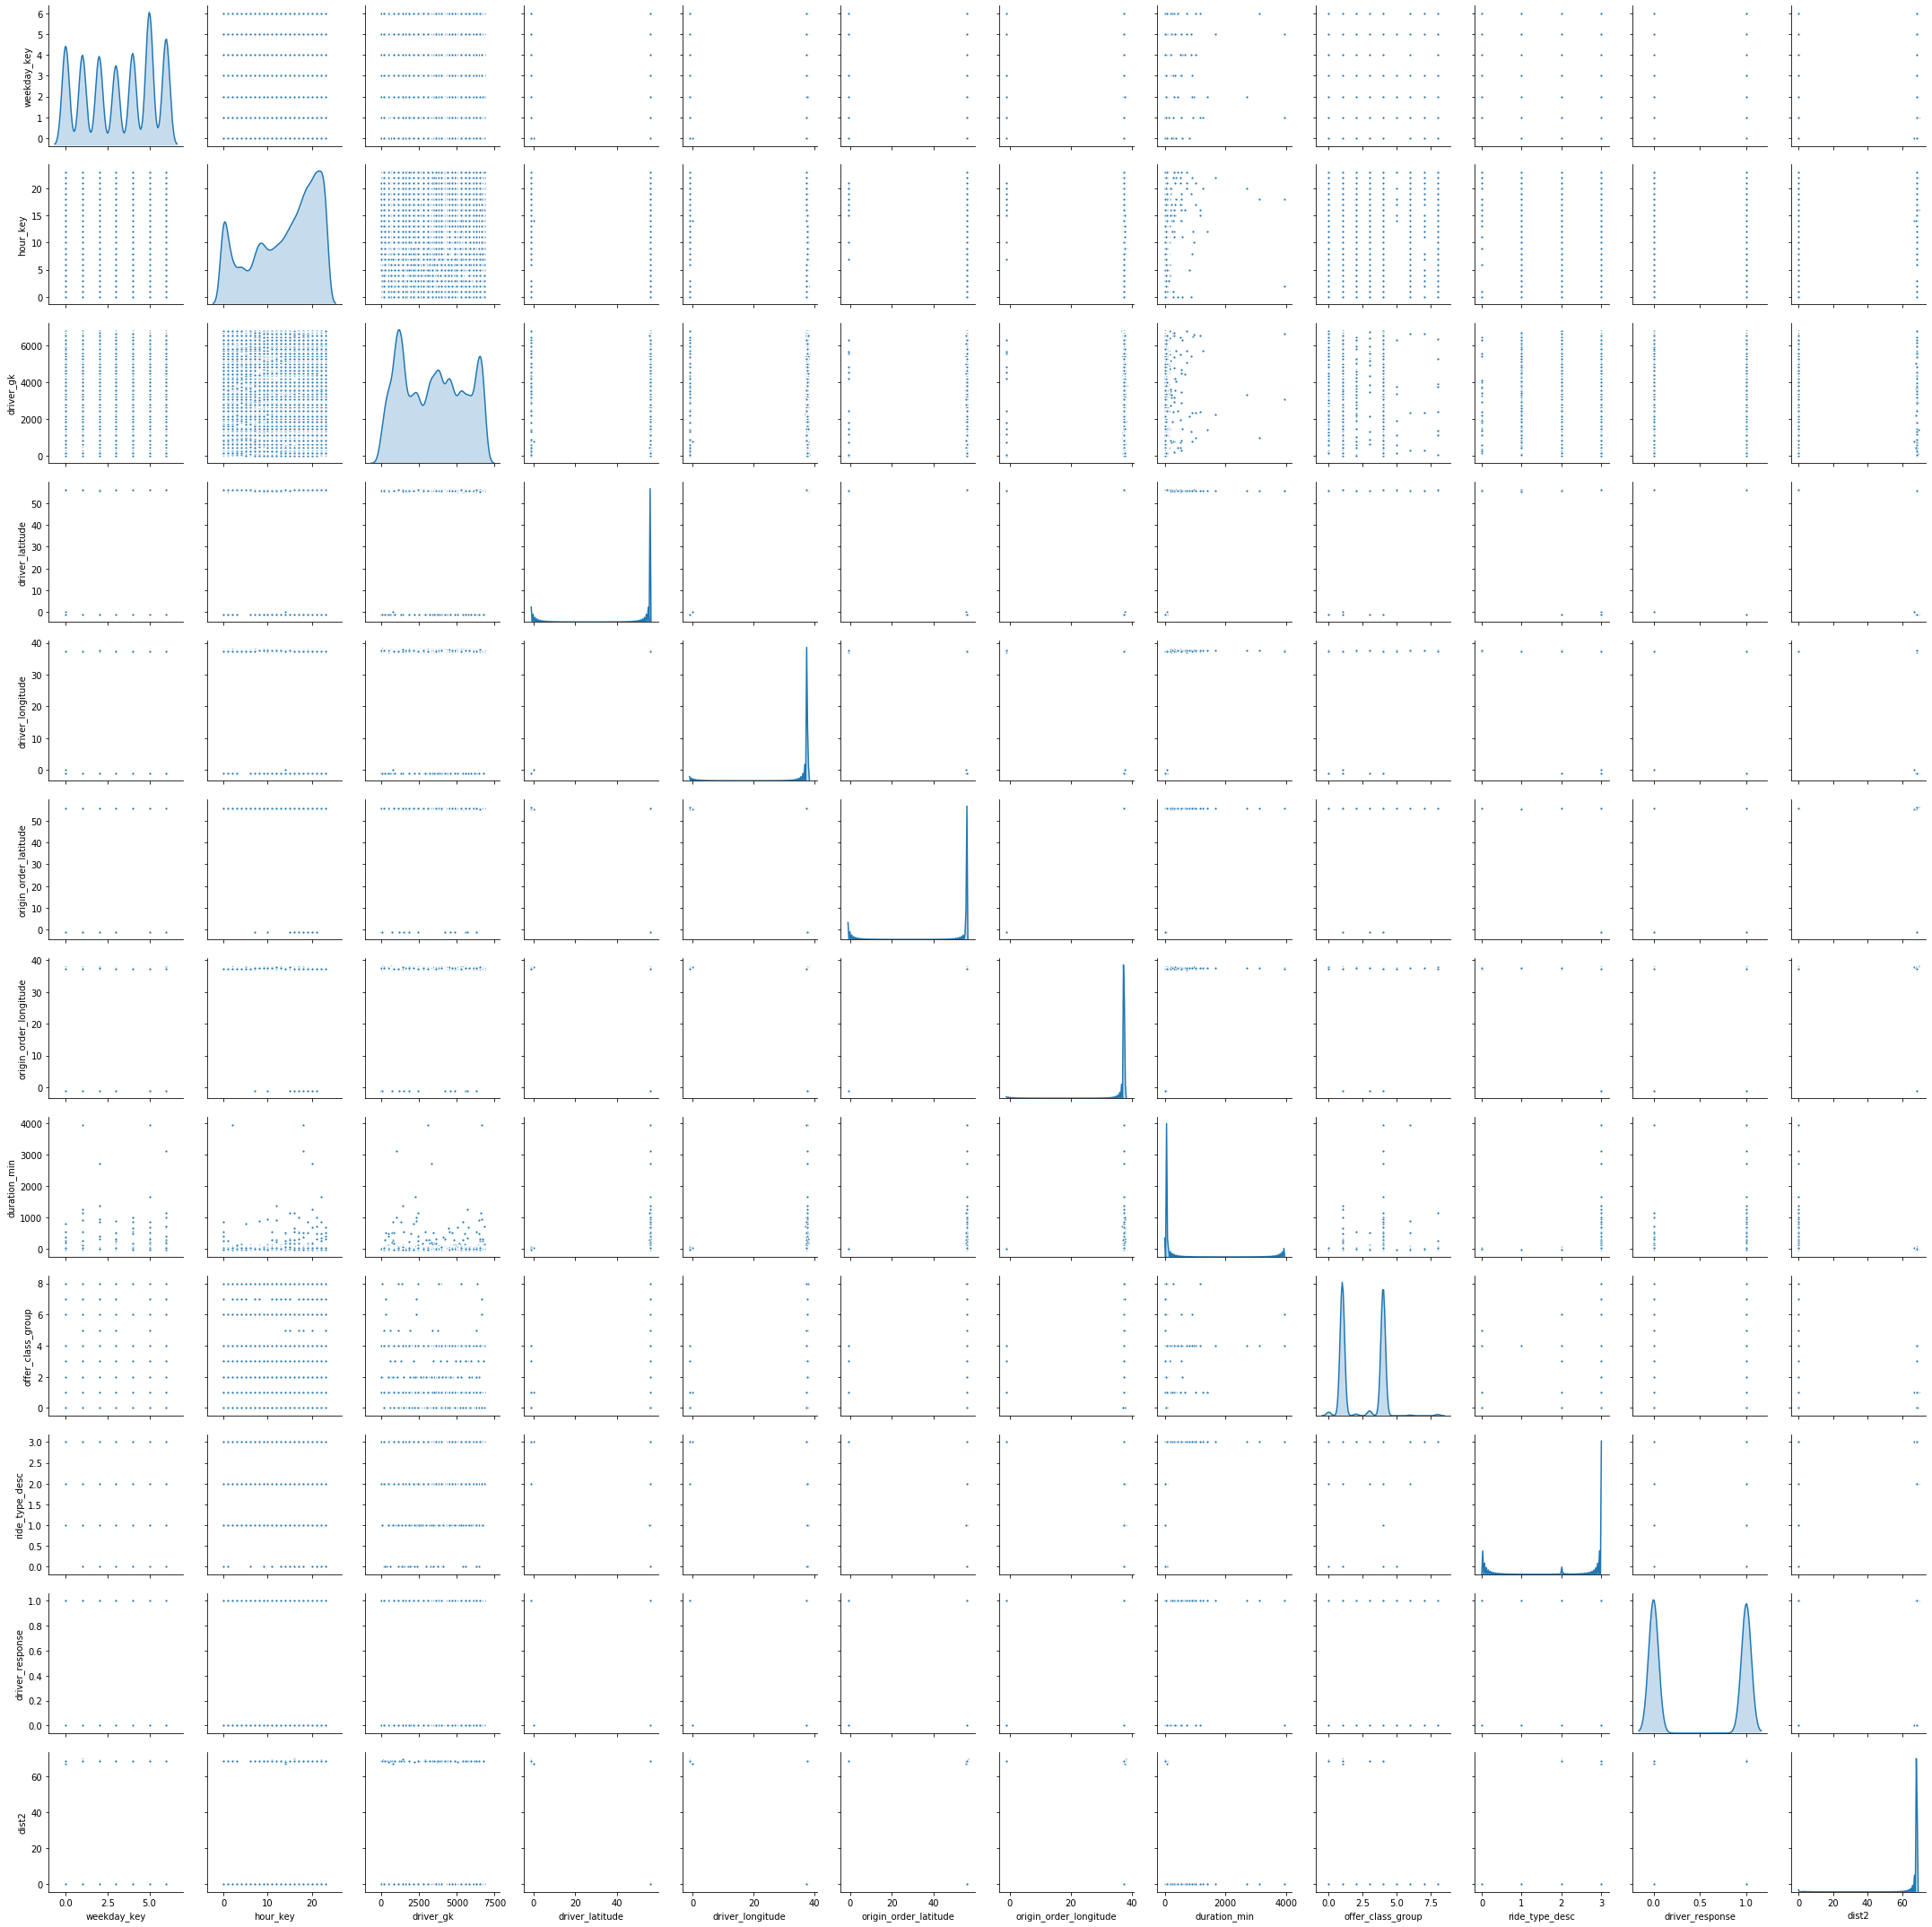

In [0]:
sns.pairplot(data, diag_kind='kde', markers='.')
plt.gcf().set_size_inches(30,30)

**7. Разделите выборку на обучаемую и тестовую.**




In [0]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('driver_response', axis=1), 
                                                    data.driver_response, test_size=0.3, 
                                                    random_state=11)
x_train

,weekday_key,hour_key,driver_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,duration_min,offer_class_group,ride_type_desc,dist2
41446,4,17,1421,55.960937,37.413274,55.962322,37.407117,-1.000,1,2,0.006311
83682,2,8,5578,55.708545,37.469243,55.717564,37.459356,-1.000,1,3,0.013383
10698,4,21,6580,55.851848,37.439793,55.860095,37.448237,13.783,4,3,0.011803
11748,6,8,4282,55.612353,37.537262,55.609878,37.540510,14.033,4,3,0.004084
30672,5,0,5917,55.960740,37.413376,55.962322,37.407117,-1.000,4,3,0.006456
...,...,...,...,...,...,...,...,...,...,...,...
97617,4,20,6302,55.951990,37.415850,55.962322,37.407117,-1.000,4,2,0.013528
72795,5,19,462,55.962071,37.417515,55.966694,37.415754,29.133,4,3,0.004947
21584,2,20,949,55.680609,37.847076,55.672755,37.860325,11.767,4,3,0.015402
36543,4,0,6534,55.415216,37.897864,55.410307,37.902451,31.050,4,3,0.006719


In [0]:
Данные разделены на 70% обучаемых и 30% тестовых.

**8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost**

Напишем функции сброса квантиля данных и обучения модели случайного леса.


In [0]:
def quantile_drop(data_t3, target_column_list, quantile_vol):
  for i in target_column_list:
    x = data_t3[data_t3.columns[i]]
    data_t3 = data_t3[x >= x.quantile(quantile_vol)]
    data_t3 = data_t3[x <= x.quantile(1 - quantile_vol)]
  return data_t3

In [0]:
def RF1(dataset, target_column_num, input_nums):
  input_nums = list(set(input_nums) - {target_column_num})
  x_train, x_test, y_train, y_test = train_test_split(dataset.drop(dataset.columns[target_column_num], axis=1)[dataset.columns[[input_nums]]], dataset[dataset.columns[target_column_num]], test_size=0.3)
  model = RandomForestClassifier(n_estimators=100)
  model.fit(x_train, y_train)
  score =  model.score(x_test, y_test)
  real_score = round(100*(score - np.float(1 / dataset[dataset.columns[target_column_num]].unique().shape[0])), 3) # реальные очки модели с вычетом случайного угадывания
  print('model score', score, type(score))
  print('real score', real_score,'%') 
  print(classification_report(y_test, model.predict(x_test)))
  sns.barplot(dataset.drop(dataset.columns[target_column_num], axis=1)[dataset.columns[[input_nums]]].columns, model.feature_importances_)
  plt.xticks(rotation=90)
  plt.gcf().set_size_inches(15,8)
  plt.title('Важность признаков для модели')
  plt.show()
  return real_score

C:\Users\alexe\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


model score 0.8120333333333334 <class 'numpy.float64'>
real score 31.203 %
              precision    recall  f1-score   support

           0       0.85      0.76      0.81     15265
           1       0.78      0.86      0.82     14735

    accuracy                           0.81     30000
   macro avg       0.82      0.81      0.81     30000
weighted avg       0.82      0.81      0.81     30000



C:\Users\alexe\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


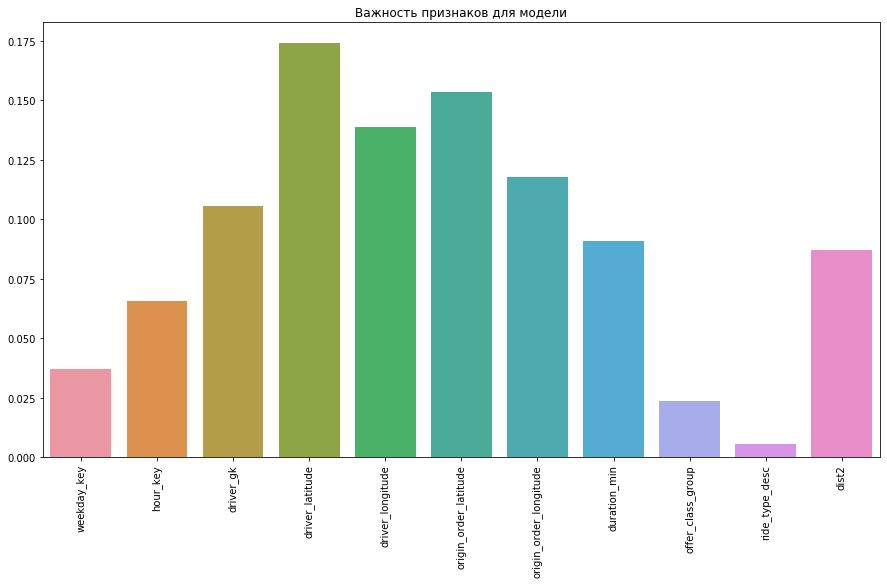

C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


model score 0.8202053812173713 <class 'numpy.float64'>
real score 32.021 %
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      7677
           1       0.79      0.92      0.85      9754

    accuracy                           0.82     17431
   macro avg       0.83      0.81      0.81     17431
weighted avg       0.83      0.82      0.82     17431



C:\Users\alexe\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


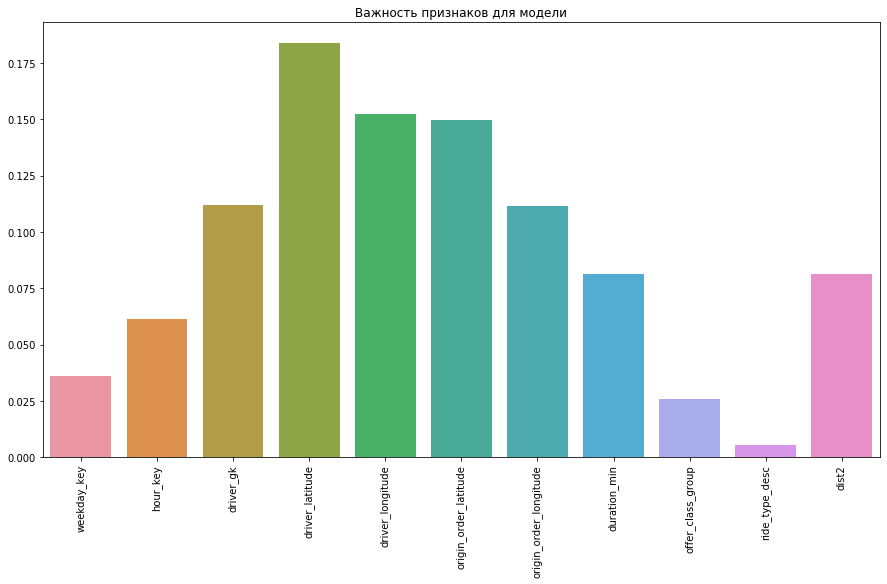

C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


model score 0.8036552991627527 <class 'numpy.float64'>
real score 30.366 %
              precision    recall  f1-score   support

           0       0.83      0.61      0.71      3783
           1       0.79      0.92      0.85      6011

    accuracy                           0.80      9794
   macro avg       0.81      0.77      0.78      9794
weighted avg       0.81      0.80      0.80      9794



C:\Users\alexe\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


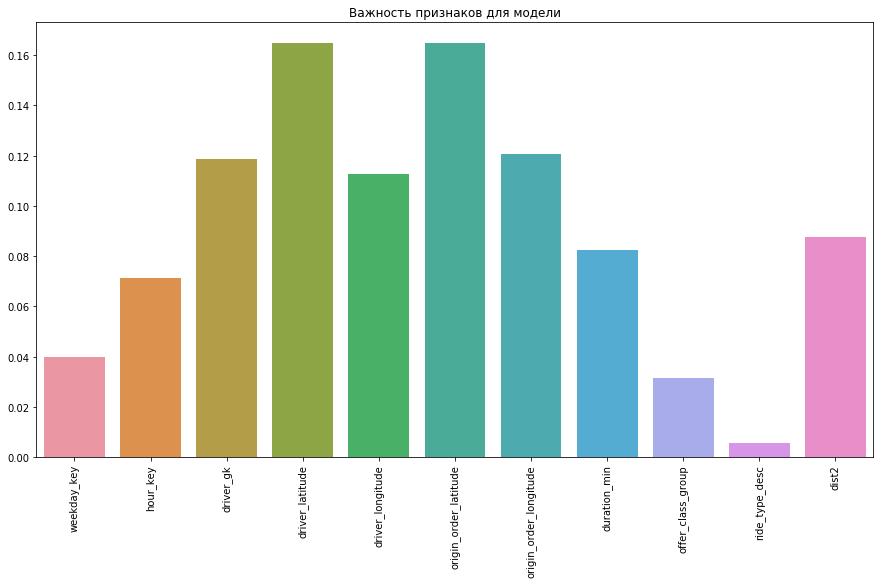

C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


model score 0.7829023992546005 <class 'numpy.float64'>
real score 28.29 %
              precision    recall  f1-score   support

           0       0.70      0.31      0.43      1136
           1       0.79      0.95      0.87      3157

    accuracy                           0.78      4293
   macro avg       0.75      0.63      0.65      4293
weighted avg       0.77      0.78      0.75      4293



C:\Users\alexe\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


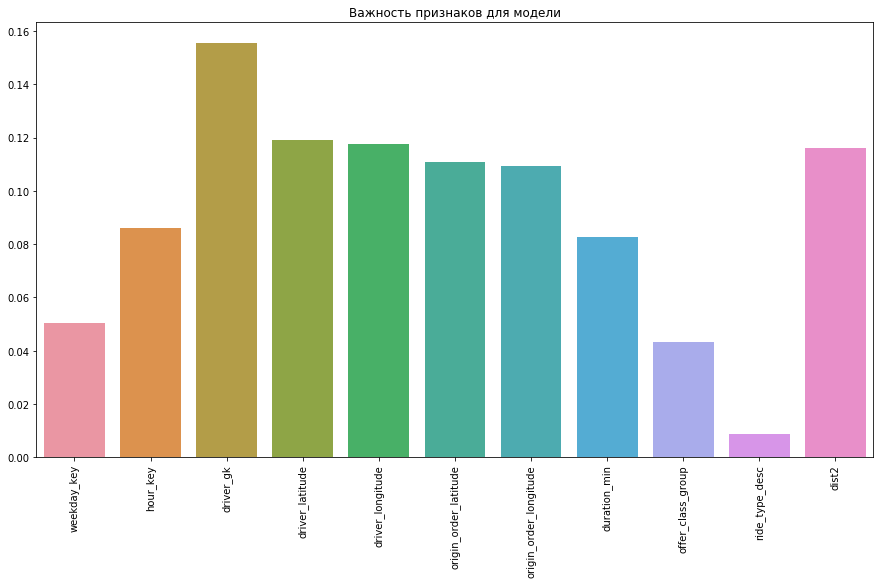

C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


model score 0.7854467629748528 <class 'numpy.float64'>
real score 28.545 %
              precision    recall  f1-score   support

           0       0.65      0.30      0.41       466
           1       0.80      0.95      0.87      1403

    accuracy                           0.79      1869
   macro avg       0.73      0.62      0.64      1869
weighted avg       0.77      0.79      0.75      1869



C:\Users\alexe\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


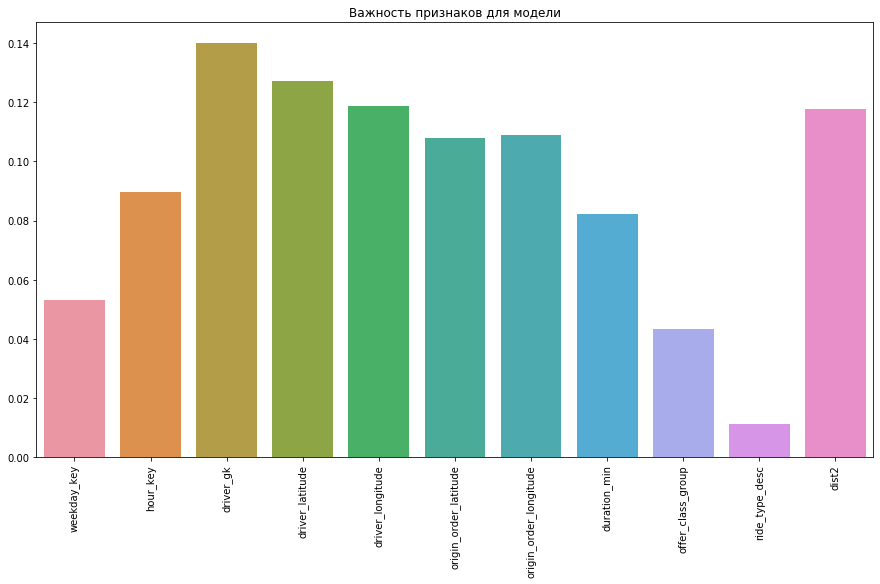

C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


model score 0.7531914893617021 <class 'numpy.float64'>
real score 25.319 %
              precision    recall  f1-score   support

           0       0.61      0.18      0.27       186
           1       0.76      0.96      0.85       519

    accuracy                           0.75       705
   macro avg       0.69      0.57      0.56       705
weighted avg       0.72      0.75      0.70       705



C:\Users\alexe\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


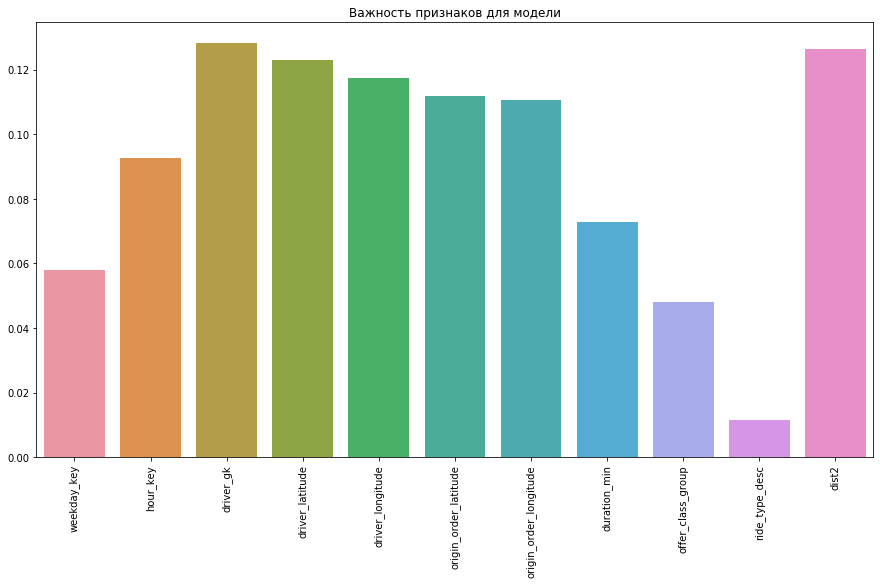

In [0]:
results = pd.DataFrame(columns=['quantile drop', 'result', 'data shape'])
for i in range(0, 30, 5):
  q = i * 0.01
  data_tx = quantile_drop(data, [3,4,5,6,7,11], q)
  results = results.append({'quantile drop':q, 'result':RF1(data_tx, 10, range(12)), 'data shape':data_tx.shape[0]}, ignore_index=True)


In [0]:
results

,quantile drop,result,data shape
0,0.00,31.203,100000.0
1,0.05,32.021,58102.0
2,0.10,30.366,32644.0
3,0.15,28.290,14308.0
4,0.20,28.545,6228.0
5,0.25,25.319,2347.0


Text(0.5, 1.0, 'Зависимость очков модели от процентов сброса квантилей датасета')

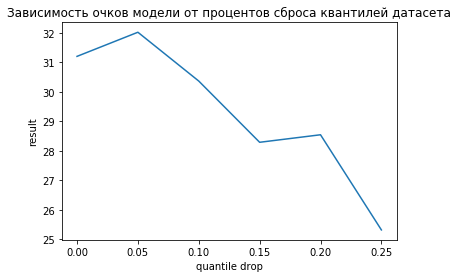

In [0]:
sns.lineplot(x = results['quantile drop'], y = results['result'])
plt.title('Зависимость очков модели от процентов сброса квантилей датасета')

Сброс 5% данных сверху и снизу немного увеличил результат, максимальный результат  составил 82,021%

В целом, случайный леc неплохой алгоритм для подобных данных.